In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2    
from numpy import asarray

In [32]:
train=pd.read_csv('/content/drive/MyDrive/Ankit/dec 2020 codalab/meme/New train caption.csv',sep=',')
train.head()

,Label,imagename,captions
0,Not_troll,Not_troll_0.jpg,Ada pikkalipayalugala
1,Not_troll,Not_troll_1.jpg,Etho sambavam nadandhirukkum pola
2,Not_troll,Not_troll_10.jpg,Vunnayellam frienda vechirukken paaru
3,Not_troll,Not_troll_100.jpg,Idho! Ivan dhaan naan nasama ponadhukku kaaranam
4,Not_troll,Not_troll_1000.jpg,Ennada lusu thanama pesikittu irukka lusu payale


In [13]:
#counting labels      

train['Label'].value_counts()


troll        1282
Not_troll    1018
Name: Label, dtype: int64

In [14]:
#LIST OF IMAGE_ID 
image_col = train['Label'].tolist()
#image_col

In [26]:
## task into array
from keras.utils.np_utils import to_categorical
classes_list = ["troll","Not_troll"]
label_index = train['Label'].apply(classes_list.index)
label1 = np.asarray(label_index)
label=to_categorical(label1)
label

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

#Image data reading

In [16]:
def loadImg(path="drive/MyDrive/Ankit/dec 2020 codalab/meme/training_img/uploaded_tamil_memes"):
    return[os.path.join(path, fileName) for fileName in os.listdir(path)]
print(len(loadImg()))
loadedImageFile=loadImg()
print(len(loadedImageFile))

2300
2300


In [17]:
loadedImageFile[0]

'drive/MyDrive/Ankit/dec 2020 codalab/meme/training_img/uploaded_tamil_memes/Not_troll_485.jpg'

In [18]:
imgLoded=[]
for image in loadedImageFile:
  imgLoded.append(cv2.imread(image, 1))
#print(imgLoded)
#print(imgLoded[0])
print(len(imgLoded))

2300


(420, 650, 3)


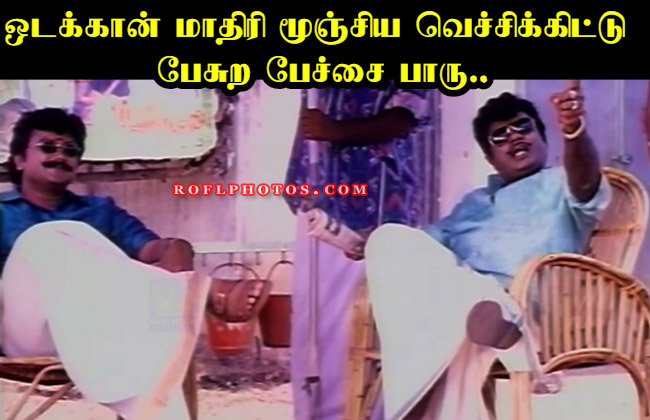

In [42]:
from google.colab.patches import cv2_imshow
print(imgLoded[300].shape)
cv2_imshow(imgLoded[300])

In [45]:
image_array = np.asarray(imgLoded)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [47]:
image_array

array([array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 22,  32,  56],
        [ 22,  32,  56],
        [ 22,  32,  56],
        ...,
        [ 52,  85, 118],
        [ 60,  91, 124],
        [ 60,  93, 126]],

       [[ 24,  32,  55],
        [ 24,  32,  55],
        [ 24,  32,  55],
        ...,
        [ 60,  85, 111],
        [ 70,  93, 119],
        [ 69,  94, 120]],

       [[  0,   0,  15],
        [  0,   0,  15],
        [  0,   0,  15],
        ...,
        [  0,   0,  20],
        [  0,   0,  18],
        [  0,   0

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_array,label, test_size=0.25, random_state=42)

In [49]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1725,) (575,) (1725, 2) (575, 2)
